# Clustering and K-means

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

# Load dataset
Read in the dataset into a Pandas `DataFrame`.

In [2]:
df = pd.read_csv('./data/cleveland.csv', header=None)

## Data Cleaning

In [3]:
df_clean = df.copy()

### Split features and target

In [4]:
features = df_clean.columns.tolist()[:-1]
target = df_clean.columns.tolist()[-1]

### Replace string values in features

In [5]:
df_clean.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null object
12    303 non-null object
dtypes: float64(11), object(2)
memory usage: 30.9+ KB


In [6]:
df_clean[11].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df_clean[12].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
df_clean[11] = df_clean[11].apply(lambda x: 0 if x == '?' else float(x))
df_clean[12] = df_clean[12].apply(lambda x: 0 if x == '?' else float(x))

In [9]:
df_clean.loc[:, features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null float64
12    303 non-null float64
dtypes: float64(13)
memory usage: 30.9 KB


### Normalize features

In [10]:
df_clean.loc[:, features] = normalize(df_clean.loc[:, features].values)

### Binarize y
1 will be heart disease diagnosis and 0 will mean no diagnosis.

In [11]:
df_clean[13] = np.where(df_clean[13].values > 0, 0, 1)

## Modeling
### Split features and target

In [12]:
X = df_clean.iloc[:, :13]
y = df_clean.iloc[:, 13]

# Dictionary to store predictions
predictions = {'kmeans': [],
               'minibatch': [],
               'x_pca': []}

In [13]:
def run_kmeans_models(X, y, k):
    
    # Reduce it to k components.
    X_pca = PCA(2).fit_transform(X)
    predictions['x_pca'] = X_pca
    
    # 1. KMeans model
    # Calculate predicted values.
    predictions['kmeans'] = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)
    
    # 2. Minibatch KMeans model
    # Each batch will be made up of 200 data points.
    minibatchkmeans = MiniBatchKMeans(
        init='random',
        n_clusters=k,
        batch_size=200)
    minibatchkmeans.fit(X_pca)

    # Add the new predicted cluster memberships to the data frame.
    predictions['minibatch'] = minibatchkmeans.predict(X_pca)
    
    # Compare KMeans predictions to actual values
    print(f'KMeans vs target [k = {k}]:')
    print(pd.crosstab(predictions['kmeans'], y))
    
    # Compare KMeans minibatch predictions to actual values
    print(f'Minibatch KMeans vs target [k = {k}]:')
    print(pd.crosstab(predictions['minibatch'], y))
    
    # Comparing KMeans with KMeans minibatch
    print(f'KMeans vs Minibatch [k = {k}]:')
    print(pd.crosstab(predictions['kmeans'], predictions['minibatch']))

In [14]:
def compare_kmeans():
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    ax[0].scatter(predictions['x_pca'][:, 0], predictions['x_pca'][:, 1], c=predictions['kmeans'])
    ax[0].set_title('KMeans')
    
    ax[1].scatter(predictions['x_pca'][:, 0], predictions['x_pca'][:, 1], c=predictions['minibatch'])
    ax[1].set_title('Minibatch KMeans')
    plt.show()

KMeans vs target [k = 2]:
13      0   1
row_0        
0      84  65
1      55  99
Minibatch KMeans vs target [k = 2]:
13      0   1
row_0        
0      54  99
1      85  65
KMeans vs Minibatch [k = 2]:
col_0    0    1
row_0          
0        0  149
1      153    1


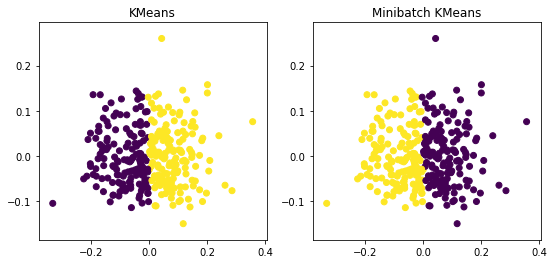

KMeans vs target [k = 3]:
13      0   1
row_0        
0      65  70
1      25  61
2      49  33
Minibatch KMeans vs target [k = 3]:
13      0   1
row_0        
0      22  77
1      40  31
2      77  56
KMeans vs Minibatch [k = 3]:
col_0   0   1   2
row_0            
0      29  55  51
1      70  16   0
2       0   0  82


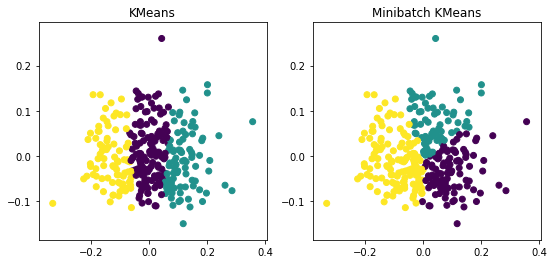

KMeans vs target [k = 4]:
13      0   1
row_0        
0      40  21
1      37  67
2      42  20
3      20  56
Minibatch KMeans vs target [k = 4]:
13      0   1
row_0        
0      42  23
1      30  63
2      27  50
3      40  28
KMeans vs Minibatch [k = 4]:
col_0   0   1   2   3
row_0                
0       6   0   0  55
1      10  81   0  13
2      49   0  13   0
3       0  12  64   0


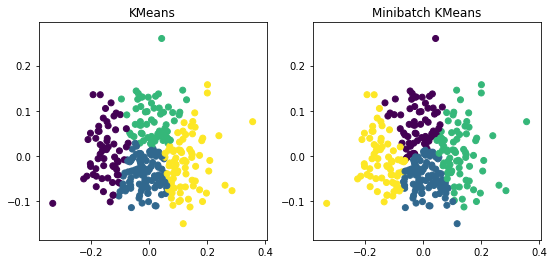

KMeans vs target [k = 5]:
13      0   1
row_0        
0      15  21
1      36  12
2      14  58
3      34  45
4      40  28
Minibatch KMeans vs target [k = 5]:
13      0   1
row_0        
0      37  18
1      15  23
2      38  44
3      36  22
4      13  57
KMeans vs Minibatch [k = 5]:
col_0   0   1   2   3   4
row_0                    
0       0  34   0   2   0
1      48   0   0   0   0
2       0   4   0   0  68
3       7   0  72   0   0
4       0   0  10  56   2


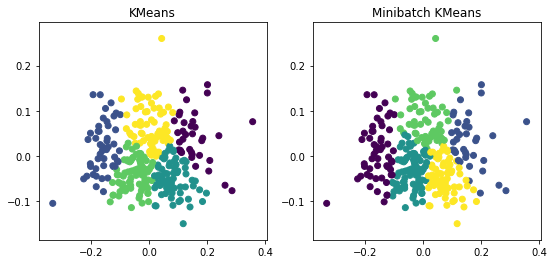

KMeans vs target [k = 6]:
13      0   1
row_0        
0      14  52
1      20  21
2      34  20
3      14  21
4      23   6
5      34  44
Minibatch KMeans vs target [k = 6]:
13      0   1
row_0        
0      19   8
1      34  43
2       4  20
3      33  11
4      31  24
5      18  58
KMeans vs Minibatch [k = 6]:
col_0   0   1   2   3   4   5
row_0                        
0       0   0  10   0   0  56
1       0  21   0  20   0   0
2      10   0   0   0  41   3
3      17   0  14   0   0   4
4       0   0   0  24   5   0
5       0  56   0   0   9  13


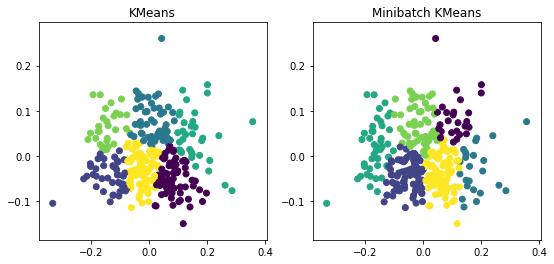

In [15]:
k_values = np.arange(5) + 2
for k in k_values:
    run_kmeans_models(X, y, k)
    compare_kmeans()

# Observations
After five different values of k, from 2 - 6, neither K-means nor minibatch K-means performed well. There were certain clusters that were distinct, with a high number of values assigned to one class and a low number of values assigned to the second class. There were other clusters where the numbers assigned to each class was almost equal.